In [1]:
import multiprocessing as mp
from fit_dftemplater import *

In [5]:
def templateDataFrames(variation):
    baseDir = common.getBaseDirectory()
    signal = False
    if signal:
        region = 'signal'
    else:
        region = 'control'

    tp = DFTemplater(variation, signalRegion=signal)
    xShp,xCnt,yShp,yCnt = tp.makeTemplatesAndTargets()
    
    # save the template and target
    np.save(baseDir + "data/templates/shaping_{}Region/X_{}".format(region,variation),xShp)
    np.save(baseDir + "data/templates/counting_{}Region/X_{}".format(region,variation),xCnt)
    if variation == '':
        np.save(baseDir + "data/templates/shaping_{}Region/Y_".format(region),yShp)
        np.save(baseDir + "data/templates/counting_{}Region/Y_".format(region),yCnt)
    
def runTemplateDataFrames(vlist):
    processes = []
    for v in vlist:
        processes.append(mp.Process(target=templateDataFrames,args=(v,)))
    for ps in processes:
        ps.start()
    for ps in processes:
        ps.join()

In [6]:
runTemplateDataFrames(['EPtDown','MuPtDown','TauPtDown',""]) # lepEnergy
runTemplateDataFrames(["JESUp","JESDown","JERUp","JERDown"]) # jetEnergy
runTemplateDataFrames(["BTagUp","BTagDown","MistagUp","MistagDown"]) # bTagging

In [19]:
baseDir = common.getBaseDirectory()
X = np.load(baseDir + "data/templates/counting_signalRegion/X_.npy")
Y = np.load(baseDir + "data/templates/counting_signalRegion/Y_.npy")

In [20]:
temp = np.concatenate(X,axis=1)

In [26]:
np.sum(temp[0:21],axis=0)

(16,)

(-1, 16)

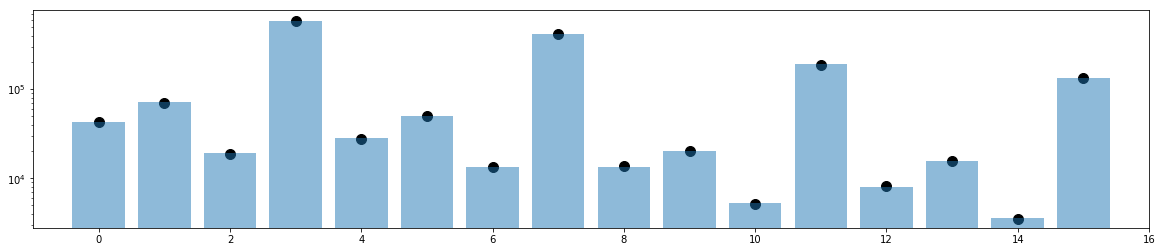

In [18]:

# X = np.load(baseDir + "data/templates/counting_controlRegion/X_.npy")
# Y = np.load(baseDir + "data/templates/counting_controlRegion/Y_.npy")
temp = np.concatenate(X,axis=1)
temp = np.sum(temp,axis=0)
targ = np.concatenate(Y,axis=0)

# making plot
plt.figure(figsize=(20,4),facecolor='w')
c = np.arange(temp.size)
plt.bar(c, temp, lw=2, alpha=0.5)
plt.scatter(c, targ, c='k',s=100)
plt.yscale('log')
plt.xlim(c.min()-1,c.max()+1)